### **Analysis**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
msft_data = pd.read_csv('MSFT.csv')
aapl_data = pd.read_csv('AAPL.csv')
tsla_data = pd.read_csv('TSLA.csv')
meta_data = pd.read_csv('META.csv')

In [ ]:
company_data = {'MSFT': msft_data,'AAPL': aapl_data,'TSLA': tsla_data,'META': meta_data}


In [ ]:
before_covid = '2017-1-31'
during_covid_start = '2020-03-01'
during_covid_end = '2021-06-30'


In [ ]:
for company, data in company_data.items():
    data['Date'] = pd.to_datetime(data['Date'])
    data['COVID_Category'] = pd.cut(data['Date'],
        bins=[pd.to_datetime(before_covid), pd.to_datetime(during_covid_start), pd.to_datetime(during_covid_end), pd.to_datetime(data['Date'].max())],
        labels=['Before COVID', 'During COVID', 'After COVID'])


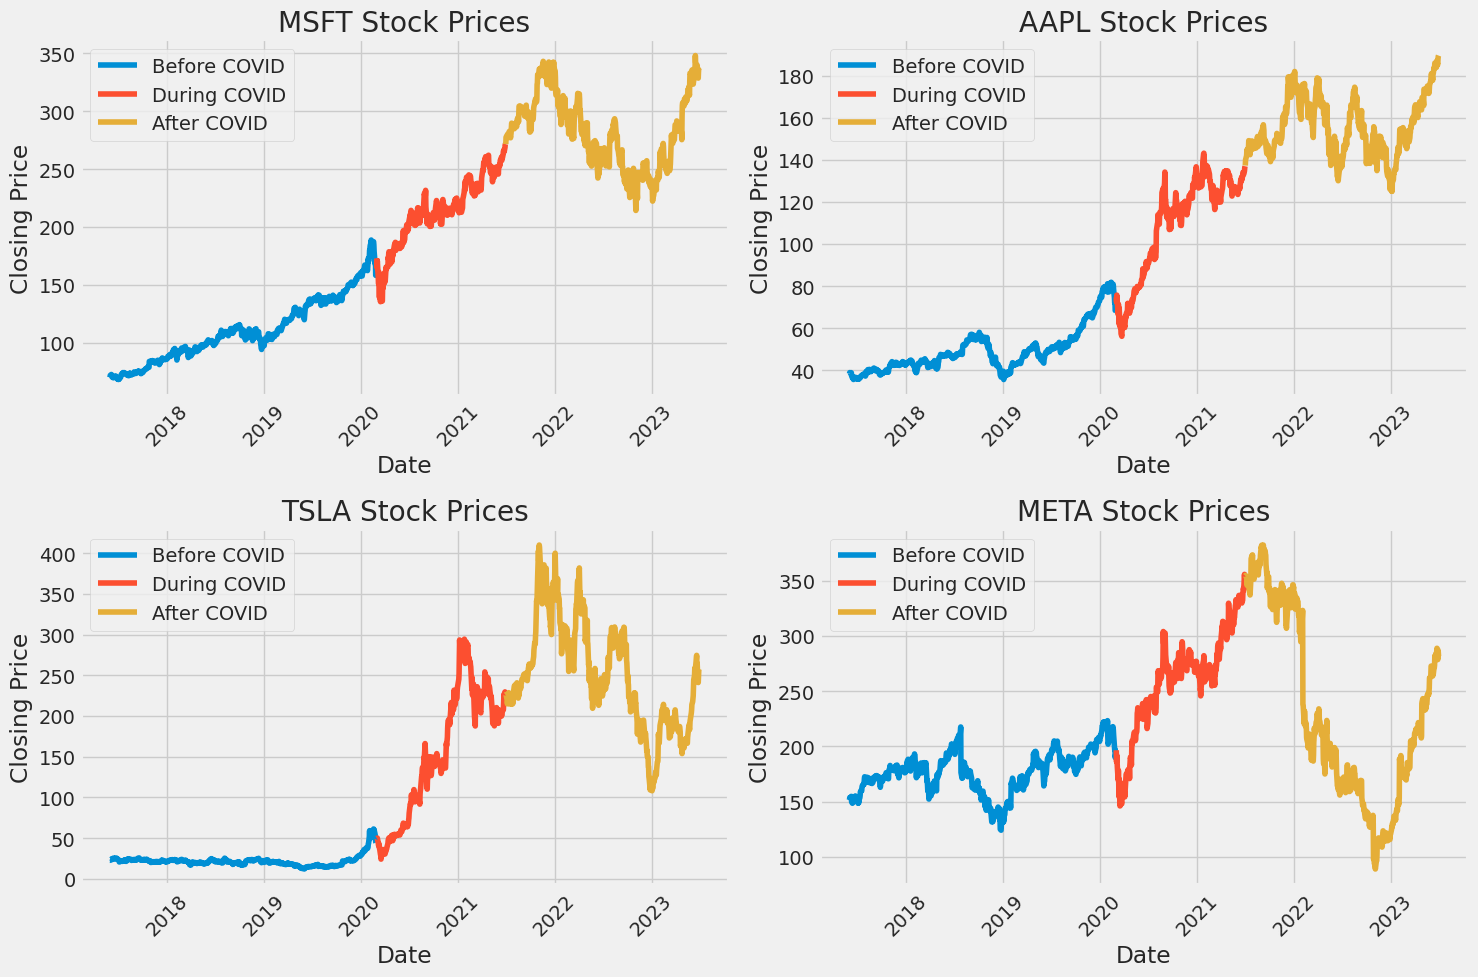

In [ ]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()
for idx, (company, data) in enumerate(company_data.items()):
    ax = axs[idx]

    for category in ['Before COVID', 'During COVID', 'After COVID']:
        subset = data[data['COVID_Category'] == category]
        ax.plot(subset['Date'], subset['Close'], label=category)

    ax.set_title(f'{company} Stock Prices')
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


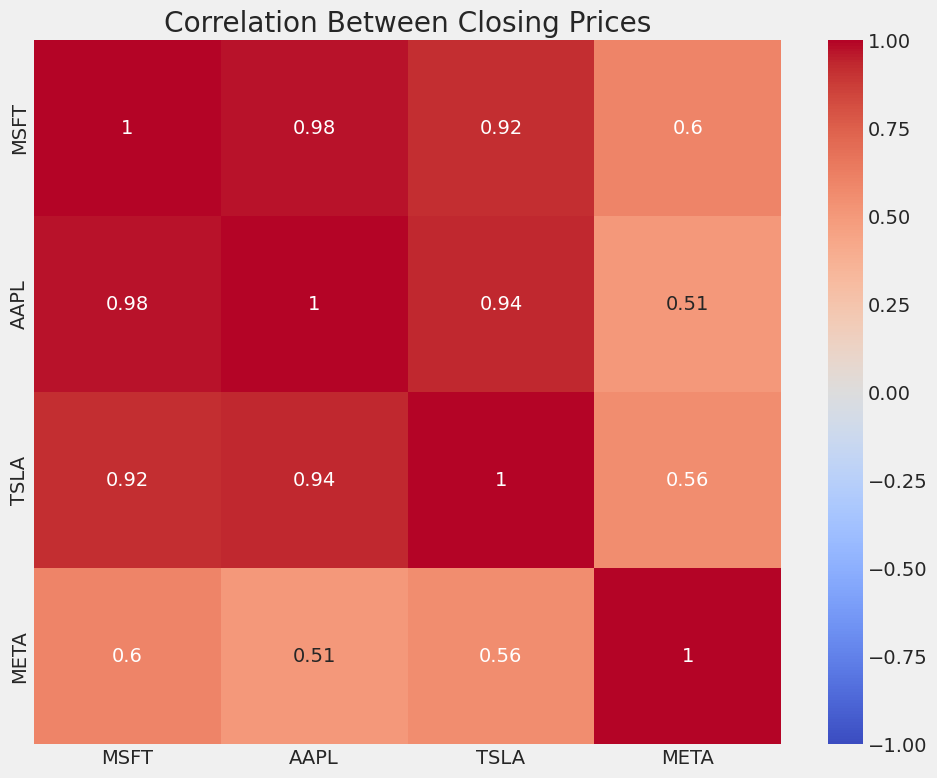

In [ ]:
combined_data = pd.DataFrame()
for company, data in company_data.items():
    combined_data[company] = data['Close']

correlation_matrix = combined_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Closing Prices')
plt.tight_layout()
plt.show()

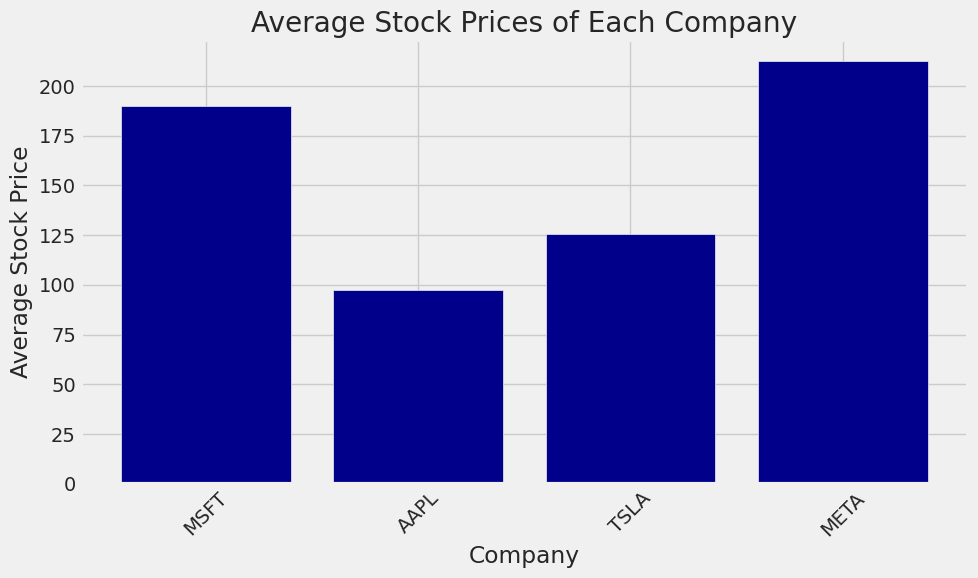

In [ ]:
average_prices = {}
for company, data in company_data.items():
    avg_price = data['Close'].mean()
    average_prices[company] = avg_price

plt.figure(figsize=(10, 6))
plt.bar(average_prices.keys(), average_prices.values(), color='darkblue')
plt.title('Average Stock Prices of Each Company')
plt.xlabel('Company')
plt.ylabel('Average Stock Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


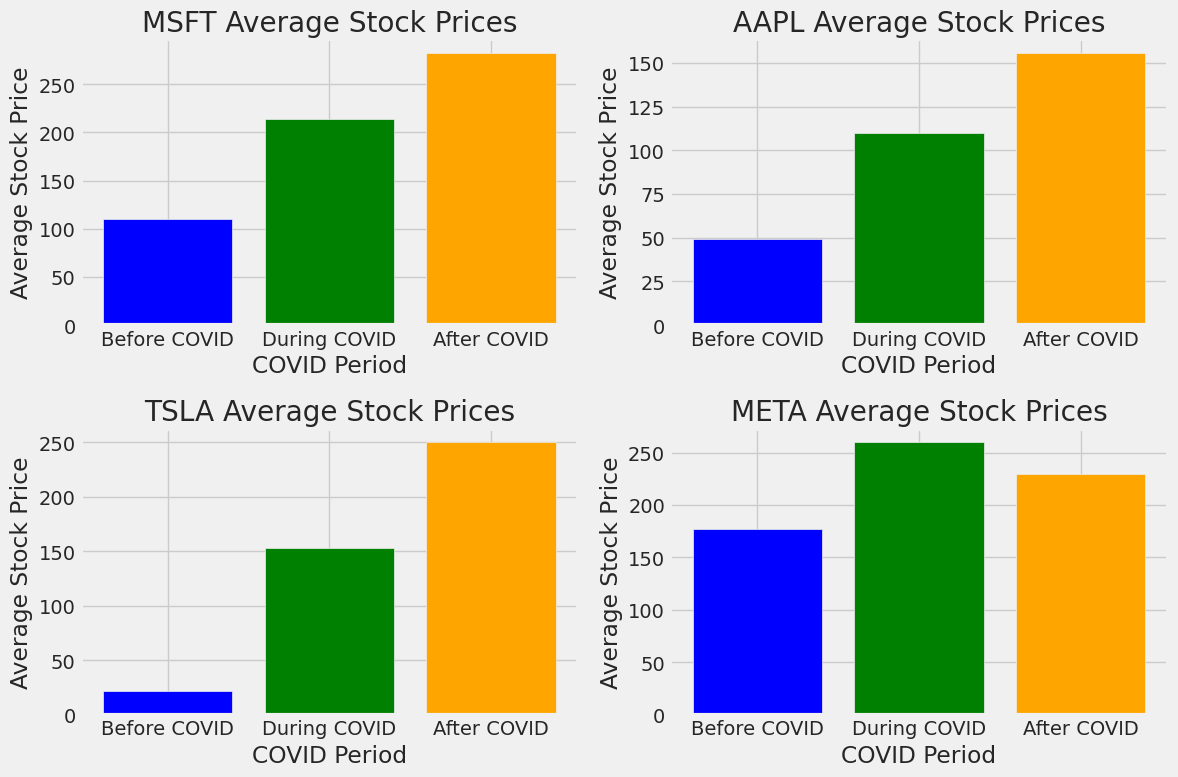

In [ ]:
plt.figure(figsize=(12, 8))

for idx, (company, data) in enumerate(company_data.items()):
    data['Date'] = pd.to_datetime(data['Date'])
    data['COVID_Category'] = pd.cut(data['Date'],
        bins=[pd.to_datetime(before_covid), pd.to_datetime(during_covid_start), pd.to_datetime(during_covid_end), pd.to_datetime(data['Date'].max())],
        labels=['Before COVID', 'During COVID', 'After COVID'])

    avg_prices = []
    for category in ['Before COVID', 'During COVID', 'After COVID']:
        avg_price = data[data['COVID_Category'] == category]['Close'].mean()
        avg_prices.append(avg_price)

    plt.subplot(2, 2, idx + 1)
    plt.bar(['Before COVID', 'During COVID', 'After COVID'], avg_prices, color=['blue', 'green', 'orange'])
    plt.title(f'{company} Average Stock Prices')
    plt.xlabel('COVID Period')
    plt.ylabel('Average Stock Price')

plt.tight_layout()
plt.show()

In [ ]:
# highest and lowest stock prices for each company during each period
for company, data in company_data.items():
    data['Date'] = pd.to_datetime(data['Date'])
    data['COVID_Category'] = pd.cut(data['Date'],
        bins=[pd.to_datetime(before_covid), pd.to_datetime(during_covid_start), pd.to_datetime(during_covid_end), pd.to_datetime(data['Date'].max())],
        labels=['Before COVID', 'During COVID', 'After COVID'])

    grouped = data.groupby('COVID_Category')['Close'].agg([max, min])
    print(f'{company} Stock Prices:')
    print(grouped)
    print('\n')

MSFT Stock Prices:
                       max         min
COVID_Category                        
Before COVID    188.699997   68.169998
During COVID    271.399994  135.419998
After COVID     348.100006  214.250000


AAPL Stock Prices:
                       max         min
COVID_Category                        
Before COVID     81.800003   35.547501
During COVID    143.160004   56.092499
After COVID     189.589996  125.019997


TSLA Stock Prices:
                       max         min
COVID_Category                        
Before COVID     61.161331   11.931333
During COVID    294.363342   24.081333
After COVID     409.970001  108.099998


META Stock Prices:
                       max         min
COVID_Category                        
Before COVID    223.229996  124.059998
During COVID    355.640015  146.009995
After COVID     382.179993   88.910004




In [ ]:
for company, data in company_data.items():
    data['Daily_Return'] = data['Close'].pct_change()  # daily return
    avg_daily_return = data['Daily_Return'].mean()  # average daily return
    print(f'{company} Average Daily Return: {avg_daily_return:.4f}')

MSFT Average Daily Return: 0.0012
AAPL Average Daily Return: 0.0012
TSLA Average Daily Return: 0.0024
META Average Daily Return: 0.0008


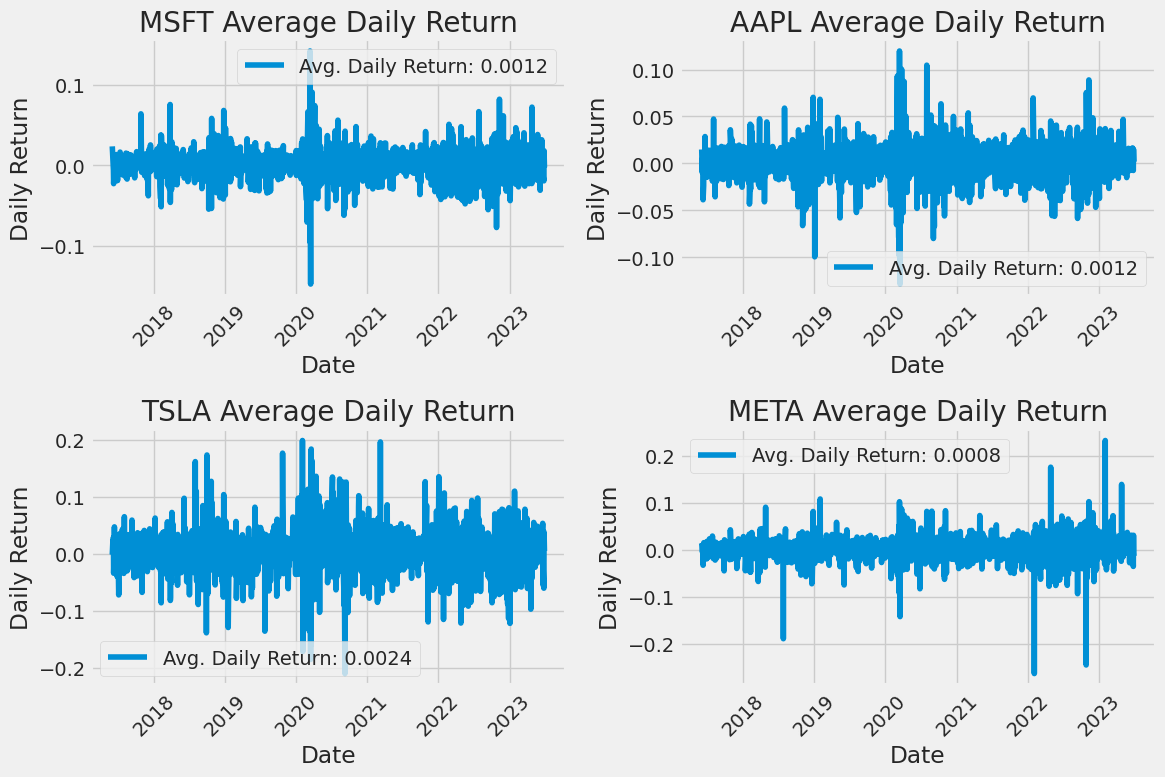

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()
for idx, (company, data) in enumerate(company_data.items()):
    data['Daily_Return'] = data['Close'].pct_change()
    avg_daily_return = data['Daily_Return'].mean()

    ax = axs[idx]
    ax.plot(data['Date'], data['Daily_Return'], label=f'Avg. Daily Return: {avg_daily_return:.4f}')
    ax.set_title(f'{company} Average Daily Return')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Return')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
risk_data = []
for company, data in company_data.items():
    data['Date'] = pd.to_datetime(data['Date'])
    data['COVID_Category'] = pd.cut(data['Date'],
        bins=[pd.to_datetime(before_covid), pd.to_datetime(during_covid_start), pd.to_datetime(during_covid_end), pd.to_datetime(data['Date'].max())],
        labels=['Before COVID', 'During COVID', 'After COVID'])

    during_covid_data = data[data['COVID_Category'] == 'During COVID']
    during_covid_data['Daily_Return'] = during_covid_data['Close'].pct_change()
    risk = during_covid_data['Daily_Return'].std()
    risk_data.append((company, risk))

risk_data.sort(key=lambda x: x[1])

companies = [company[0] for company in risk_data]
risk_values = [company[1] for company in risk_data]

<ipython-input-22-874eecfd20c4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  during_covid_data['Daily_Return'] = during_covid_data['Close'].pct_change()
<ipython-input-22-874eecfd20c4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  during_covid_data['Daily_Return'] = during_covid_data['Close'].pct_change()
<ipython-input-22-874eecfd20c4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

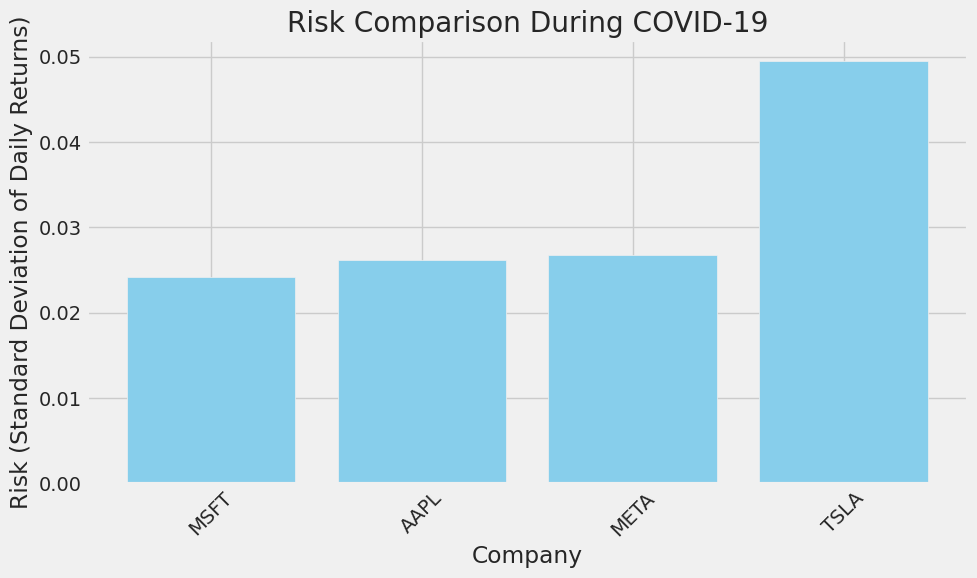

The company that faced less risk during COVID-19 is: MSFT


In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(companies, risk_values, color='skyblue')
plt.title('Risk Comparison During COVID-19')
plt.xlabel('Company')
plt.ylabel('Risk (Standard Deviation of Daily Returns)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

least_risk_company = risk_data[0]
print(f"The company that faced less risk during COVID-19 is: {least_risk_company[0]}")

### **Prediction**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
data = pd.read_csv('MSFT.csv')
closing_prices = data['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler()
closing_prices_scaled = scaler.fit_transform(closing_prices)

In [ ]:
train_size = int(len(closing_prices_scaled) * 0.8)
train_data = closing_prices_scaled[:train_size]
test_data = closing_prices_scaled[train_size:]

In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [ ]:
seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [51]:
model.fit(X_train, y_train, epochs=100, batch_size=4)

Epoch 1/100
304/304 [==============================] - 8s 15ms/step - loss: 1.6878e-04
Epoch 2/100
304/304 [==============================] - 2s 7ms/step - loss: 1.6080e-04
Epoch 3/100
304/304 [==============================] - 3s 9ms/step - loss: 1.5727e-04
Epoch 4/100
304/304 [==============================] - 3s 9ms/step - loss: 1.6159e-04
Epoch 5/100
304/304 [==============================] - 3s 10ms/step - loss: 1.6883e-04
Epoch 6/100
304/304 [==============================] - 4s 13ms/step - loss: 1.6511e-04
Epoch 7/100
304/304 [==============================] - 3s 11ms/step - loss: 1.6179e-04
Epoch 8/100
304/304 [==============================] - 2s 8ms/step - loss: 1.6496e-04
Epoch 9/100
304/304 [==============================] - 2s 8ms/step - loss: 1.6129e-04
Epoch 10/100
304/304 [==============================] - 2s 7ms/step - loss: 1.5686e-04
Epoch 11/100
304/304 [==============================] - 3s 9ms/step - loss: 1.6573e-04
Epoch 12/100
304/304 [==========================

In [52]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

10/10 [==============================] - 0s 4ms/step


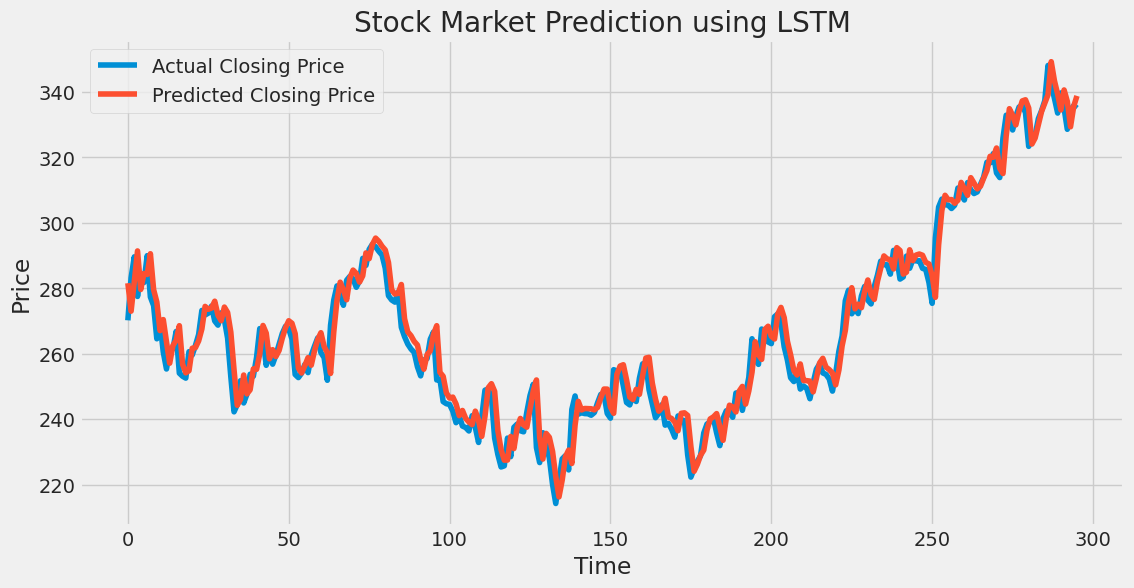

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Closing Price')
plt.plot(y_pred, label='Predicted Closing Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Market Prediction using LSTM')
plt.legend()
plt.show()


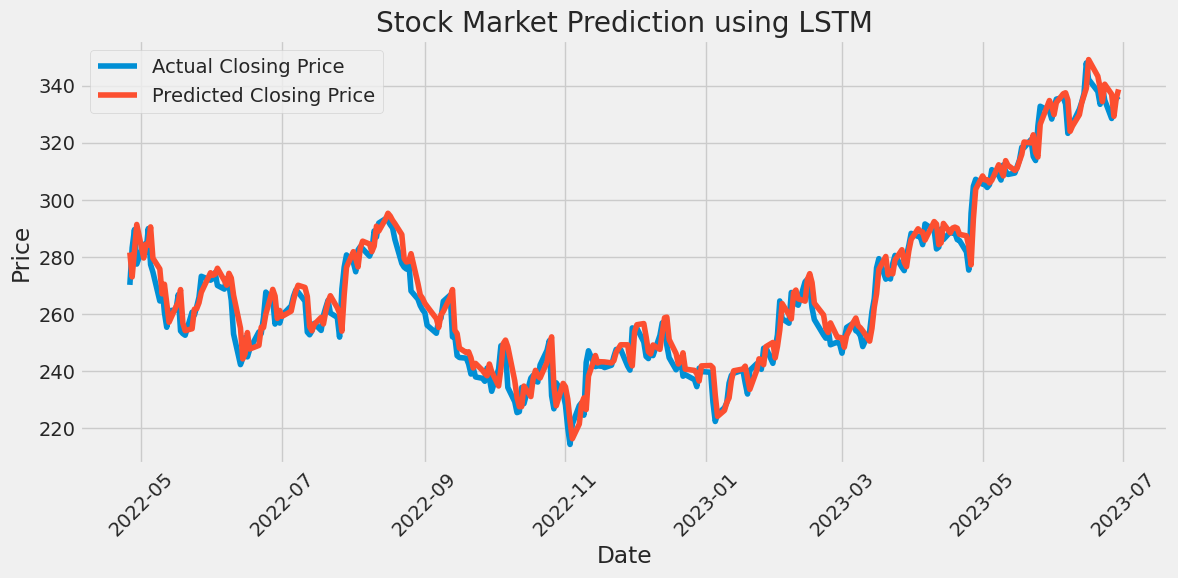

In [90]:
plt.figure(figsize=(12, 6))
test_dates = msft_data.index[train_size + seq_length:train_size + seq_length + len(y_pred)]

plt.plot(test_dates, y_test_original, label='Actual Closing Price')
plt.plot(test_dates, y_pred.flatten(), label='Predicted Closing Price')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Market Prediction using LSTM')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [54]:
test_dates = data['Date'].values[train_size + seq_length:]
comparison_df = pd.DataFrame({'Date': test_dates, 'Actual_Close': y_test_original.flatten(), 'Predicted_Close': y_pred.flatten()})
print(comparison_df)

           Date  Actual_Close  Predicted_Close
0    2022-04-26    270.220001       281.571045
1    2022-04-27    283.220001       273.019806
2    2022-04-28    289.630005       282.050140
3    2022-04-29    277.519989       291.422638
4    2022-05-02    284.470001       279.650208
..          ...           ...              ...
291  2023-06-23    335.019989       340.622284
292  2023-06-26    328.600006       337.120331
293  2023-06-27    334.570007       329.363892
294  2023-06-28    335.850006       335.643921
295  2023-06-29    335.049988       338.809448

[296 rows x 3 columns]


In [55]:
test_dates = data['Date'].values[train_size + seq_length:]

In [56]:
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 33.13844093501347
Root Mean Squared Error: 5.756599772002


In [102]:
mape = mean_absolute_percentage_error(y_test_original, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Percentage Error (MAPE): 0.02%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
model.save('/content/drive/My Drive/final_model.h5')


In [64]:
close_prices_aapl = aapl_data['Close'].values
scaler_aapl = MinMaxScaler()
close_prices_scaled_aapl = scaler_aapl.fit_transform(close_prices_aapl.reshape(-1, 1))

X_aapl, y_aapl = create_sequences(close_prices_scaled_aapl, seq_length)

In [65]:
y_pred_scaled_aapl = model.predict(X_aapl)
y_pred_aapl = scaler_aapl.inverse_transform(y_pred_scaled_aapl)

48/48 [==============================] - 1s 10ms/step


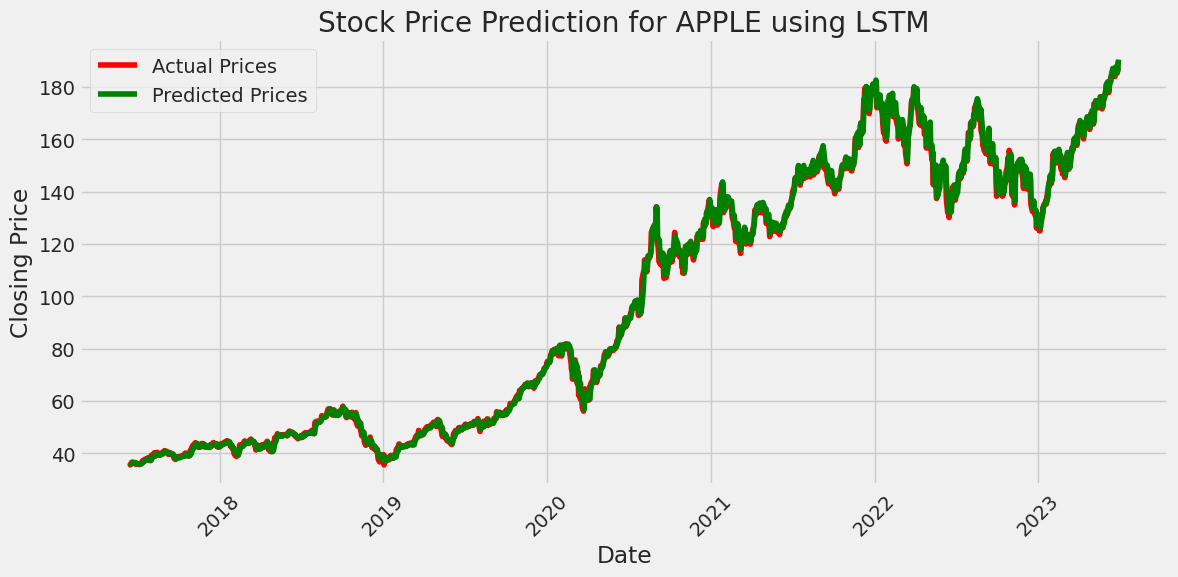

In [100]:
plt.figure(figsize=(12, 6))
plt.plot(aapl_data['Date'][seq_length:], close_prices_aapl[seq_length:], label='Actual Prices', color='red')
plt.plot(aapl_data['Date'][seq_length:], y_pred_aapl, label='Predicted Prices', color='green')
plt.title('Stock Price Prediction for APPLE using LSTM')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### **Dashboard**

In [ ]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.7
    Uninstalling Werkzeug-2.3.7:
      Successfully uninstalled Werkzeug-2.3.7


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
from tensorflow.keras.models import load_model


<ipython-input-43-de64617386d4>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-43-de64617386d4>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [59]:
model = load_model('/content/drive/MyDrive/final_model.h5')
data = pd.read_csv('MSFT.csv')


In [60]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

10/10 [==============================] - 0s 4ms/step


In [61]:
comparison_df = pd.DataFrame({'Date': test_dates, 'Actual_Close': y_test_original.flatten(), 'Predicted_Close': y_pred.flatten()})

In [101]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Stock Market Prediction Dashboard"),
    dcc.Graph(
        id='stock-prediction-plot',
        figure={
            'data': [
                {'x': comparison_df['Date'], 'y': comparison_df['Actual_Close'], 'name': 'Actual Closing Price', 'type': 'line'},
                {'x': comparison_df['Date'], 'y': comparison_df['Predicted_Close'], 'name': 'Predicted Closing Price', 'type': 'line'},
            ],
            'layout': {
                'title': 'Actual vs. Predicted Closing Prices of Microsoft',
                'xaxis': {'title': 'Date'},
                'yaxis': {'title': 'Price'}
            }
        }
    ),
])

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>